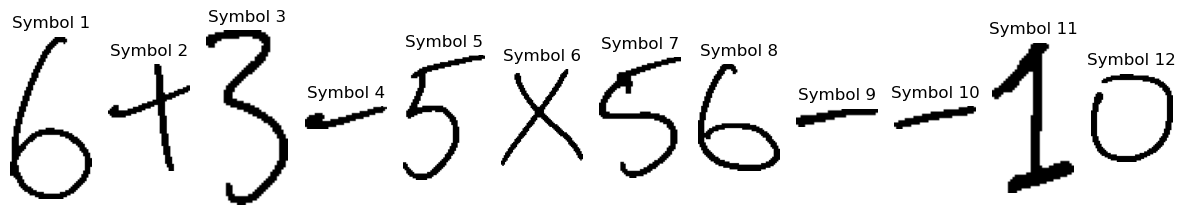

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('equation4.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 70]

filtered_contours = sorted(filtered_contours, key=lambda c: cv2.boundingRect(c)[0])

fig, axs = plt.subplots(1, len(filtered_contours), figsize=(15, 5))

symbols = []
for i, contour in enumerate(filtered_contours):
    x, y, w, h = cv2.boundingRect(contour)
    symbol_roi = binary[y:y+h, x:x+w]
    
    # Invert the symbol's colors
    symbol_roi = cv2.bitwise_not(symbol_roi)
    
    symbols.append(symbol_roi)
    axs[i].imshow(symbol_roi, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Symbol {i+1}')

plt.show()
